In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# !pip install python-docx

In [ ]:
# from docx import Document

# Przygotowanie danych

In [ ]:
maritial_status_df = pd.DataFrame({"Rok studiów": [1, 2, 5, 1, 4, 3, 2, 1, 5, 2, 3, 4, 1, 2, 5, 4, 3, 1, 4, 5, 2, 5, 3, 4, 3, 2, 5, 1],
                                   "Stan cywilny": ['W', 'W', 'M', 'W', 'M', 'W', 'M', 'W', 'M', 'W', 'M', 'M', 'W', 'W', 'M', 'M', 'M', 'M', 'M', 'W', 'W', 'M', 'W', 'W', 'M', 'W', 'M', 'W']
                                   })

In [ ]:
maritial_status_df

,Rok studiów,Stan cywilny
0,1,W
1,2,W
2,5,M
3,1,W
4,4,M
5,3,W
6,2,M
7,1,W
8,5,M
9,2,W


In [ ]:
# document = Document("/content/MED-lab-2-Zad 1-Tylko dane.docx")

In [ ]:
# table = document.tables[0]
# data = [[cell.text for cell in row.cells] for row in table.rows]

# df = pd.DataFrame(data)

In [ ]:
# df

**Wole mojego df :)**

In [ ]:
maritial_status_df["Stan cywilny binarny"] = (maritial_status_df["Stan cywilny"] == 'M').astype(int) # 1 - małżeństwo 0 - stan wolny
maritial_status_df["Rok studiów"] = maritial_status_df["Rok studiów"].astype(int)

In [ ]:
maritial_status_df

,Rok studiów,Stan cywilny,Stan cywilny binarny
0,1,W,0
1,2,W,0
2,5,M,1
3,1,W,0
4,4,M,1
5,3,W,0
6,2,M,1
7,1,W,0
8,5,M,1
9,2,W,0


# Model liniowy

                             OLS Regression Results                             
Dep. Variable:     Stan cywilny binarny   R-squared:                       0.320
Model:                              OLS   Adj. R-squared:                  0.294
Method:                   Least Squares   F-statistic:                     12.26
Date:                  Fri, 26 Dec 2025   Prob (F-statistic):            0.00169
Time:                          21:11:44   Log-Likelihood:                -14.914
No. Observations:                    28   AIC:                             33.83
Df Residuals:                        26   BIC:                             36.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0781      0.

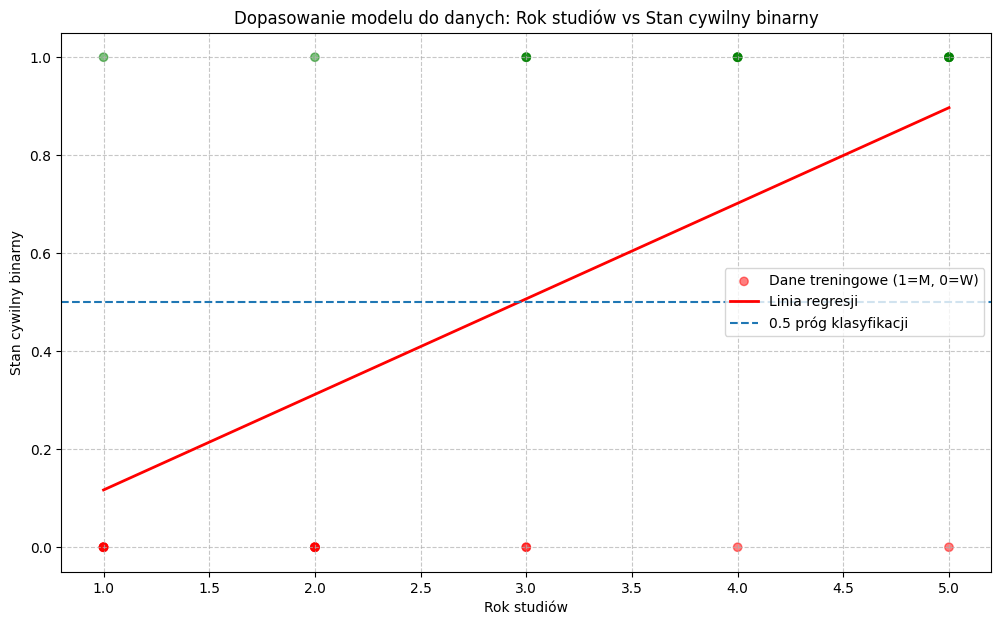

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

def calculate_std(y_test, y_pred, df):
    sse = np.sum((y_test - y_pred) ** 2)
    df_total = len(y_test) - df - 1
    # print(len(y_test), df)
    return np.sqrt(sse / df_total)


def calculate_we(y_test, y_pred, df):
  return (calculate_std(y_test, y_pred, df) / np.mean(y_test)) * 100


X_train, y_train = maritial_status_df["Rok studiów"], maritial_status_df["Stan cywilny binarny"]
X_train = sm.add_constant(X_train)
# X_train, y_train

linear_model = sm.OLS(y_train, X_train).fit()

print(linear_model.summary())

X_train_sorted = X_train.sort_values(by='Rok studiów')
prediction_results = linear_model.get_prediction(X_train_sorted)
summary_frame = prediction_results.summary_frame(alpha=0.05) # 95%

df = linear_model.df_resid  # stopnie swobody (n - k - 1)
t_crit = stats.t.ppf(1 - 0.05/2, df)

print(f"T krytyczne: {t_crit}")

plt.figure(figsize=(12, 7))
plt.scatter(X_train['Rok studiów'], y_train, c=['green' if y == 1 else 'red' for y in y_train], alpha=0.5, label='Dane treningowe (1=M, 0=W)')
plt.plot(X_train_sorted['Rok studiów'], summary_frame['mean'], color='red', linewidth=2, label='Linia regresji')

plt.axhline(0.5, linestyle="--", label="0.5 próg klasyfikacji")

plt.title('Dopasowanie modelu do danych: Rok studiów vs Stan cywilny binarny')
plt.xlabel('Rok studiów')
plt.ylabel('Stan cywilny binarny')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Obserwacje:** Jak widać, na podstawie wartości R^2, model słabo dopasowuje się do danych, mimo że udało się wyznaczyć wartość współczynnika przy zmiennej objaśniającej - Rok studiów - wartość |t| jest >= od wartości krytycznej co świadczy o tym, że jest istotny statystycznie.

**Metryki klasyfikacyjne**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
y_pred_probability = np.clip(linear_model.predict(X_train), 0, 1) # bo model liniowy moze dac poza 0-1!
y_pred_binary = (y_pred_probability >= 0.5).astype(int) # >= 0.5 -> 1, < 0.5 -> 0

conf_m = confusion_matrix(y_train, y_pred_binary)
tn, fp, fn, tp = conf_m.ravel()
specifity = tn / (tn + fp)

print(conf_m.tolist())

print(f"Macierz pomyłek:\n", conf_m)
print(f"True Positives = {tp}, True negatives = {tn}, False positives = {fp}, False negatives = {fn}")

print(f"Dokładność: {accuracy_score(y_train, y_pred_binary)}") # ile ogółem trafiłem (TP + TN / TP + TN + FP + FN)
print(f"Precyzja: {precision_score(y_train, y_pred_binary)}") # ile naprawdę trafiłem małżeństw (TP / TP + FP)
print(f"Czułość: {recall_score(y_train, y_pred_binary)}") # ile trafiłem z prawdziwych małżeństw (TP / TP + FN)
print(f"Specyficzność: {specifity}") # ile trafiłem z prawdziwych wolnych (TN / TN + FP) - specyficzność
print(f"F1: {f1_score(y_train, y_pred_binary)}") # srednia harmoniczna precision i recall
print(f"AUC: {roc_auc_score(y_train, y_pred_probability)}") # jakosc modelu przed wyborem progu



[[10, 4], [2, 12]]
Macierz pomyłek:
 [[10  4]
 [ 2 12]]
True Positives = 12, True negatives = 10, False positives = 4, False negatives = 2
Dokładność: 0.7857142857142857
Precyzja: 0.75
Czułość: 0.8571428571428571
Specyficzność: 0.7142857142857143
F1: 0.8
AUC: 0.8188775510204083


**Onbserwacje:** Modeli liniowy prawdopodobieństwa osiąga dobre wynik. AUC - 81,9% i dokładność na poziomie ~79% przy progu 0,5. Najlepszą metryką jest czułość, która wynosi ~86%, która mówi jak dobrze model klasyfikuje rzeczywiste małżeństwa - model skutecznie klasyfikuje studentów w związku małżeńskim, chociaż ma tendencję do przeklasyfikowywania studentów jako małżeństwa jeśli pod uwagę weźmiemy precyzję na poziomie 75%. Można zaobserwować zależność: im wyższy rok studiów, tym większe prawdopodobieństwo, że student jest w związku małżeńskim.

Najlepszy próg: 0.507


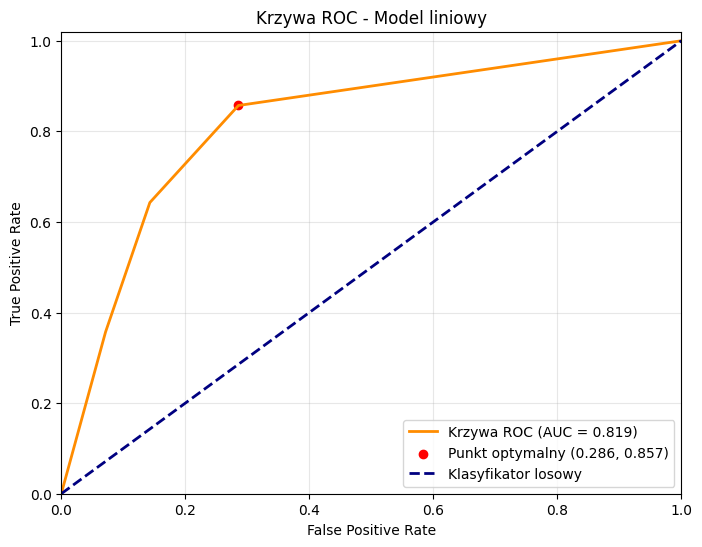

In [ ]:
# krzywa ROC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probability)  # False Positive Rate, True Positive Rate dla wszystkich progów
roc_auc = auc(fpr, tpr)  # pole pod krzywą

optimal_idx = np.argmax(tpr - fpr)  # max odleglosc, bo kompromis miedzy czulosc a specyficznosc
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

print(f"Najlepszy próg: {optimal_threshold:.3f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.3f})')
plt.scatter(optimal_fpr, optimal_tpr, color='red', label=f"Punkt optymalny ({round(optimal_fpr, 3)}, {round(optimal_tpr, 3)})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Klasyfikator losowy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC - Model liniowy')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


# Model logitowy

In [ ]:
X_train_2, y_train_2 = maritial_status_df["Rok studiów"], maritial_status_df["Stan cywilny binarny"]
X_train_2 = sm.add_constant(X_train_2)

logit_model = sm.Logit(y_train_2, X_train_2).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.515254
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     Stan cywilny binarny   No. Observations:                   28
Model:                            Logit   Df Residuals:                       26
Method:                             MLE   Df Model:                            1
Date:                  Fri, 26 Dec 2025   Pseudo R-squ.:                  0.2566
Time:                          21:17:59   Log-Likelihood:                -14.427
converged:                         True   LL-Null:                       -19.408
Covariance Type:              nonrobust   LLR p-value:                  0.001598
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8833      1.171     -2.462      0.014      -5.179      -0.588
Rok studió

In [ ]:
y_pred_probability = np.clip(logit_model.predict(X_train_2), 0, 1) # bo model liniowy moze dac poza 0-1!
y_pred_binary = (y_pred_probability >= 0.5).astype(int) # >= 0.5 -> 1, < 0.5 -> 0

conf_m = confusion_matrix(y_train_2, y_pred_binary)
tn, fp, fn, tp = conf_m.ravel()
specifity = tn / (tn + fp)

print(conf_m.tolist())

print(f"Macierz pomyłek:\n", conf_m)
print(f"True Positives = {tp}, True negatives = {tn}, False positives = {fp}, False negatives = {fn}")

print(f"Dokładność: {accuracy_score(y_train_2, y_pred_binary)}") # ile ogółem trafiłem (TP + TN / TP + TN + FP + FN)
print(f"Precyzja: {precision_score(y_train_2, y_pred_binary)}") # ile naprawdę trafiłem małżeństw (TP / TP + FP)
print(f"Czułość: {recall_score(y_train_2, y_pred_binary)}") # ile trafiłem z prawdziwych małżeństw (TP / TP + FN)
print(f"Specyficzność: {specifity}") # ile trafiłem z prawdziwych wolnych (TN / TN + FP) - specyficzność
print(f"F1: {f1_score(y_train_2, y_pred_binary)}") # srednia harmoniczna precision i recall
print(f"AUC: {roc_auc_score(y_train_2, y_pred_probability)}") # jakosc modelu przed wyborem progu


[[10, 4], [2, 12]]
Macierz pomyłek:
 [[10  4]
 [ 2 12]]
True Positives = 12, True negatives = 10, False positives = 4, False negatives = 2
Dokładność: 0.7857142857142857
Precyzja: 0.75
Czułość: 0.8571428571428571
Specyficzność: 0.7142857142857143
F1: 0.8
AUC: 0.8188775510204083


**Obserwacje:** Jak widać, dla modelu logitowego dostaliśmy te same wartości metryk jak dla modelu liniowego. Wniosek jest jeden, nie ma sensu budować dla tych danych modelu logitowego, bo jest bardziej skomplikowany a model liniowy daje te same wyniki de facto + nie rozdzielaliśmy na dane testowe i treningowe ze względu na małą liczność zbioru danych.

Najlepszy próg: 0.512


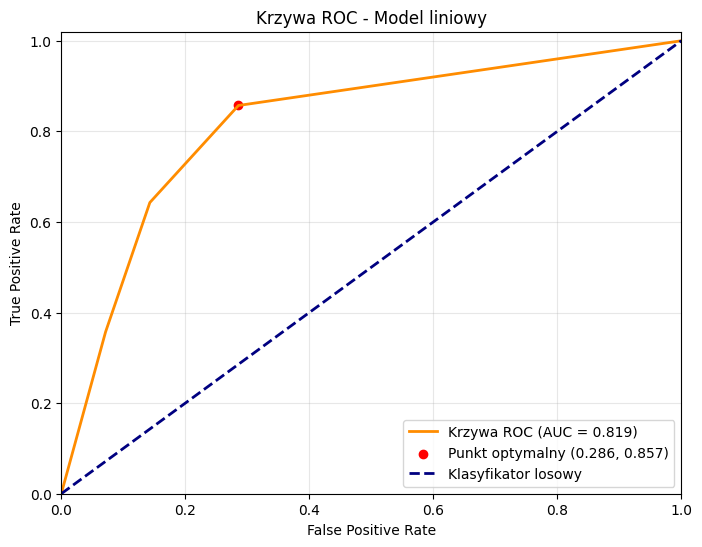

In [ ]:
# krzywa ROC
fpr, tpr, thresholds = roc_curve(y_train_2, y_pred_probability)  # False Positive Rate, True Positive Rate dla wszystkich progów
roc_auc = auc(fpr, tpr)  # pole pod krzywą

optimal_idx = np.argmax(tpr - fpr)  # max odleglosc, bo chce max true positive i najmniejsze false positive
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

print(f"Najlepszy próg: {optimal_threshold:.3f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.3f})')
plt.scatter(optimal_fpr, optimal_tpr, color='red', label=f"Punkt optymalny ({round(optimal_fpr, 3)}, {round(optimal_tpr, 3)})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Klasyfikator losowy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC - Model liniowy')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


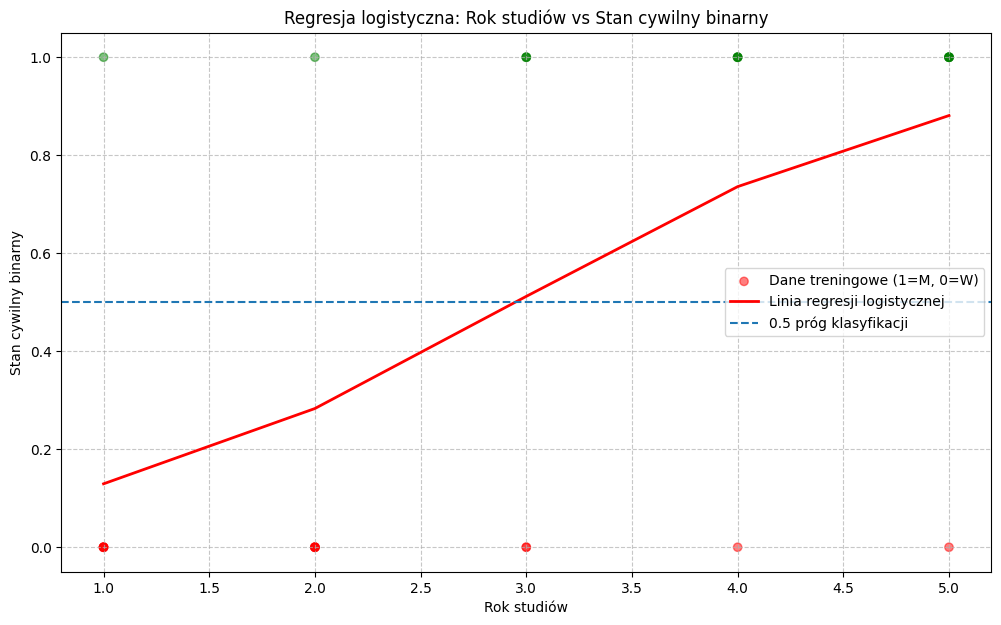

In [ ]:
X_train_sorted = X_train_2.sort_values(by='Rok studiów')

plt.figure(figsize=(12, 7))
plt.scatter(maritial_status_df["Rok studiów"], y_train_2, c=['green' if y == 1 else 'red' for y in y_train_2], alpha=0.5, label='Dane treningowe (1=M, 0=W)')
# plt.plot(X_train_2, logit_model.predict(X_train_2), color='red', linewidth=2, label='Linia regresji')
plt.plot(X_train_sorted['Rok studiów'], logit_model.predict(X_train_sorted), color='red', linewidth=2, label='Linia regresji logistycznej')

plt.axhline(0.5, linestyle="--", label="0.5 próg klasyfikacji")

plt.title('Regresja logistyczna: Rok studiów vs Stan cywilny binarny')
plt.xlabel('Rok studiów')
plt.ylabel('Stan cywilny binarny')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
